# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15 # Convert from Kelvin to Celsius
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | praia da vitoria
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | teguise
Processing Record 16 of Set 1 | al muwayh
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | moyynkum
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kailua-kona
Processing Record 22 of Set 1 | hawaiian paradise park

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.98,93,56,1.79,EC,1717281649
1,albany,42.6001,-73.9662,24.54,58,20,2.95,US,1717281649
2,praia da vitoria,38.7333,-27.0667,19.86,88,20,4.42,PT,1717281649
3,port-aux-francais,-49.3500,70.2167,1.93,70,11,20.83,TF,1717281650
4,grytviken,-54.2811,-36.5092,-3.75,82,18,4.66,GS,1717281650


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.98,93,56,1.79,EC,1717281649
1,albany,42.6001,-73.9662,24.54,58,20,2.95,US,1717281649
2,praia da vitoria,38.7333,-27.0667,19.86,88,20,4.42,PT,1717281649
3,port-aux-francais,-49.3500,70.2167,1.93,70,11,20.83,TF,1717281650
4,grytviken,-54.2811,-36.5092,-3.75,82,18,4.66,GS,1717281650


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

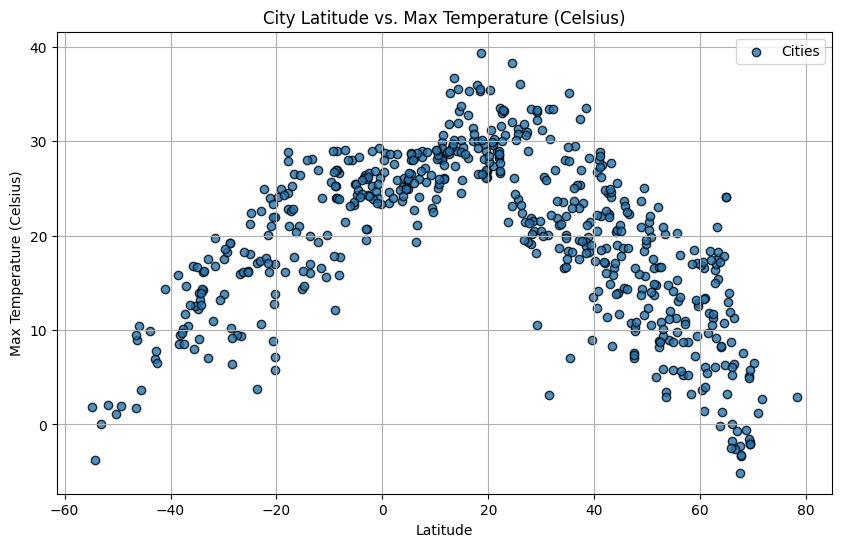

In [67]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

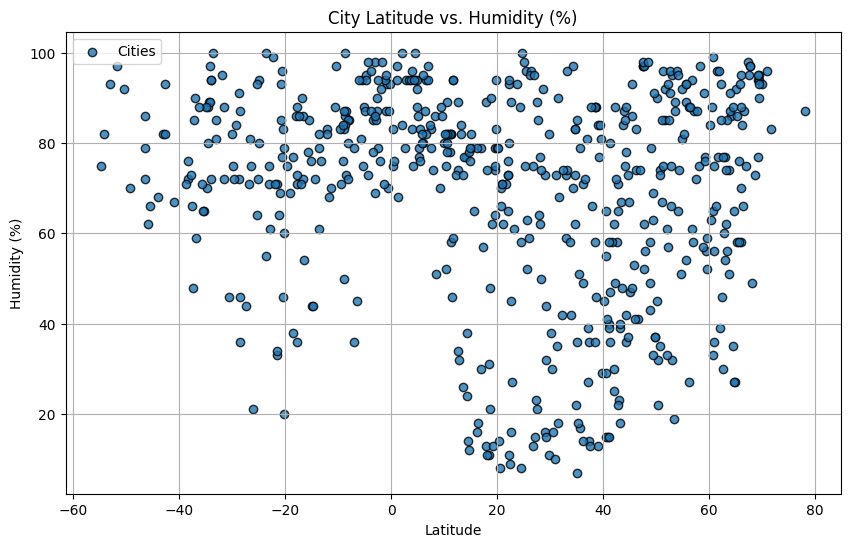

In [68]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

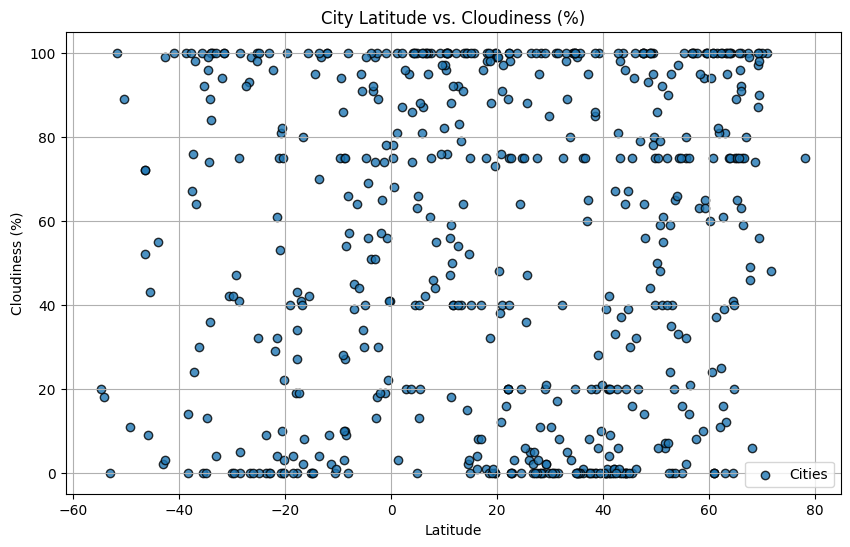

In [69]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

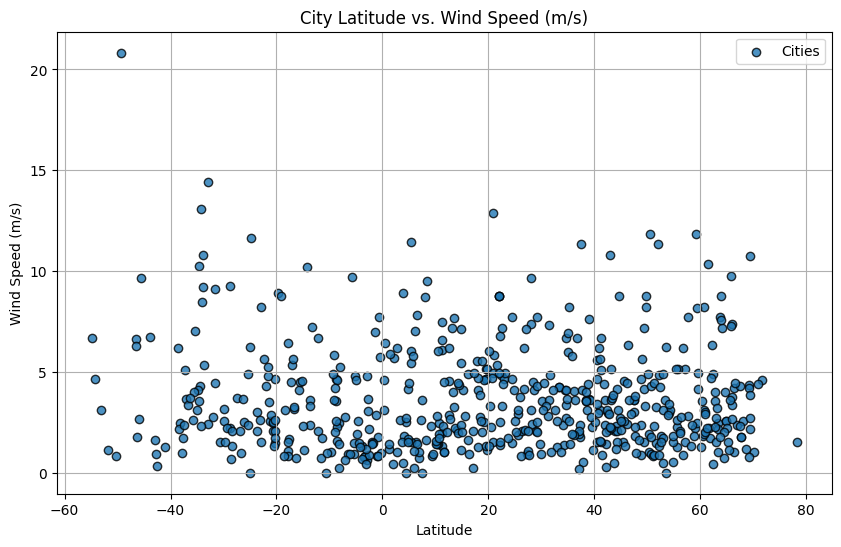

In [71]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add text for line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Position for annotations in the bottom left corner
    x_pos = x_values.min() + 1
    y_pos = y_values.min() + 1
    
    plt.annotate(line_eq, (x_pos, y_pos), fontsize=12, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend() 
    
    # Print R-squared value
    print(f"The r-squared value is {rvalue**2:.2f}")
    
    

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,24.54,58,20,2.95,US,1717281649
2,praia da vitoria,38.7333,-27.0667,19.86,88,20,4.42,PT,1717281649
5,tura,25.5198,90.2201,23.86,96,36,1.86,IN,1717281650
7,sitka,57.0531,-135.3300,10.94,58,100,5.14,US,1717281650
10,ribeira grande,38.5167,-28.7000,19.32,88,85,3.58,PT,1717281651


In [85]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.98,93,56,1.79,EC,1717281649
3,port-aux-francais,-49.3500,70.2167,1.93,70,11,20.83,TF,1717281650
4,grytviken,-54.2811,-36.5092,-3.75,82,18,4.66,GS,1717281650
6,adamstown,-25.0660,-130.1015,21.25,72,32,6.26,PN,1717281650
8,west island,-12.1568,96.8225,26.99,83,100,6.69,CC,1717281651


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.61


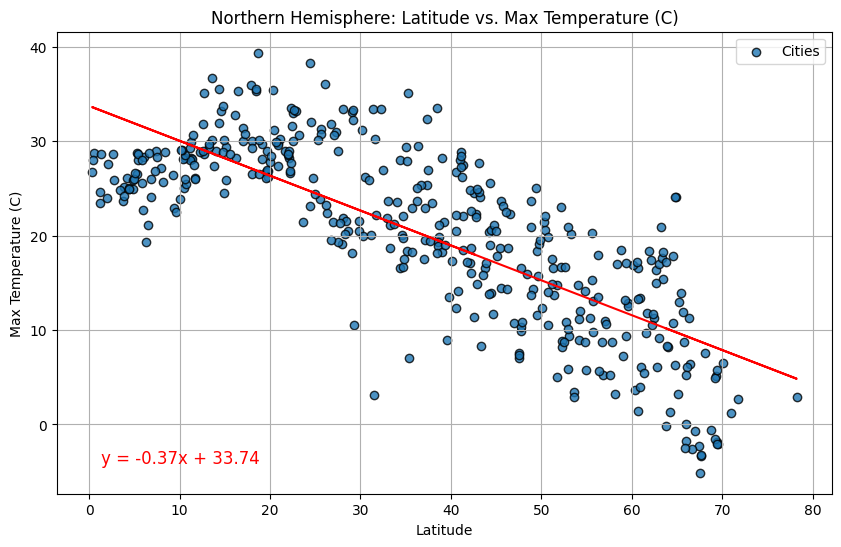

In [86]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       "Latitude", 
                       "Max Temperature (C)", 
                       "Northern Hemisphere: Latitude vs. Max Temperature (C)", 
                       "Northern_Hemisphere_Lat_vs_Max_Temp_Regression.png")


The r-squared value is 0.67


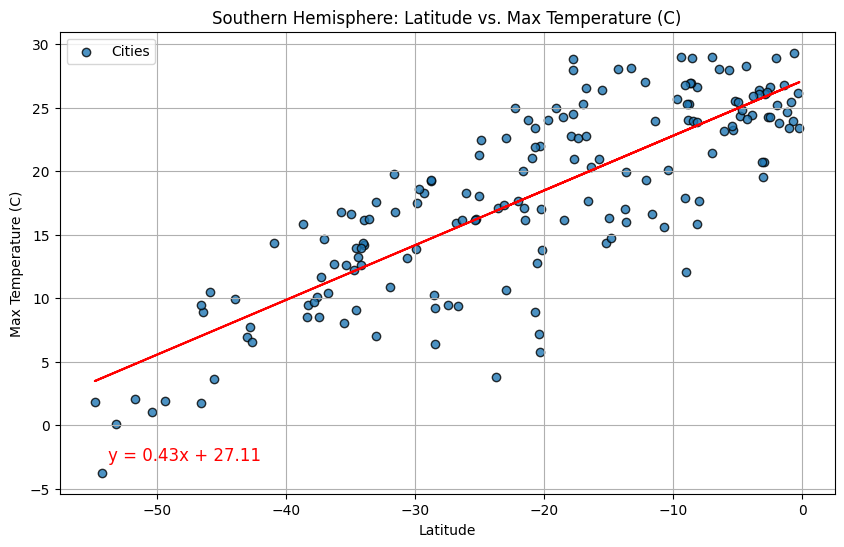

In [87]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Max Temp"], 
                       "Latitude", 
                       "Max Temperature (C)", 
                       "Southern Hemisphere: Latitude vs. Max Temperature (C)", 
                       "Southern_Hemisphere_Lat_vs_Max_Temp_Regression.png")

**Discussion about the linear relationship:

Northern Hemisphere Latitude vs. Max Temperature:
The scatter plot for latitude vs. max temperature in the Northern Hemisphere shows a clear negative linear relationship. As latitude increases (moves away from the equator), the maximum temperature tends to decrease. This relationship is expected, as regions farther from the equator generally experience cooler temperatures due to the lower angle of sunlight. The R-squared value is relatively high, indicating a strong relationship between latitude and maximum temperature. This suggests that latitude is a significant predictor of maximum temperature in the Northern Hemisphere.

Southern Hemisphere Latitude vs. Max Temperature:
The scatter plot for latitude vs. max temperature in the Southern Hemisphere shows a clear positive linear relationship. As the latitude increases (moves closer to the equator), the maximum temperature tends to increase. This is expected as regions closer to the equator generally experience higher temperatures due to the more direct angle of sunlight. The R-squared value indicates how well the linear regression line fits the data. A higher R-squared value suggests a stronger relationship between the variables. In this case, the R-squared value is relatively high, indicating that latitude is a good predictor of maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.00


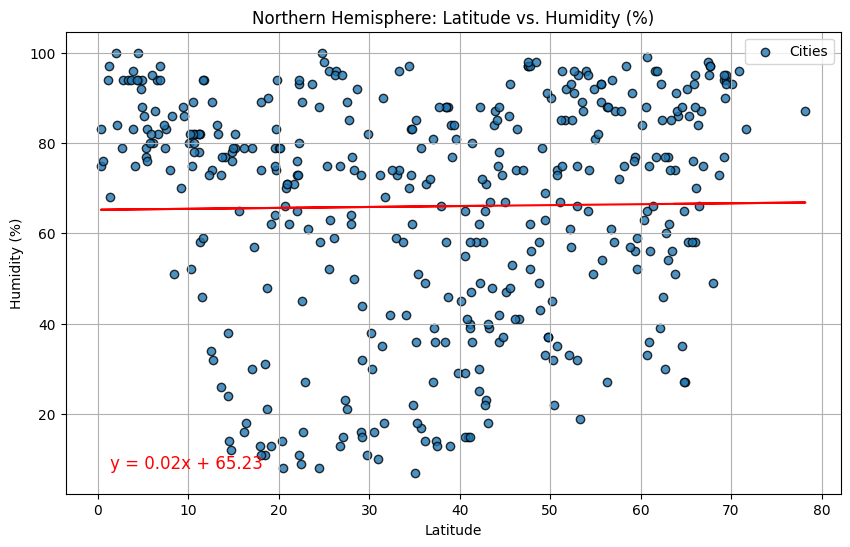

In [88]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Humidity"], 
                       "Latitude", 
                       "Humidity (%)", 
                       "Northern Hemisphere: Latitude vs. Humidity (%)", 
                       "Northern_Hemisphere_Lat_vs_Humidity_Regression.png")

The r-squared value is 0.01


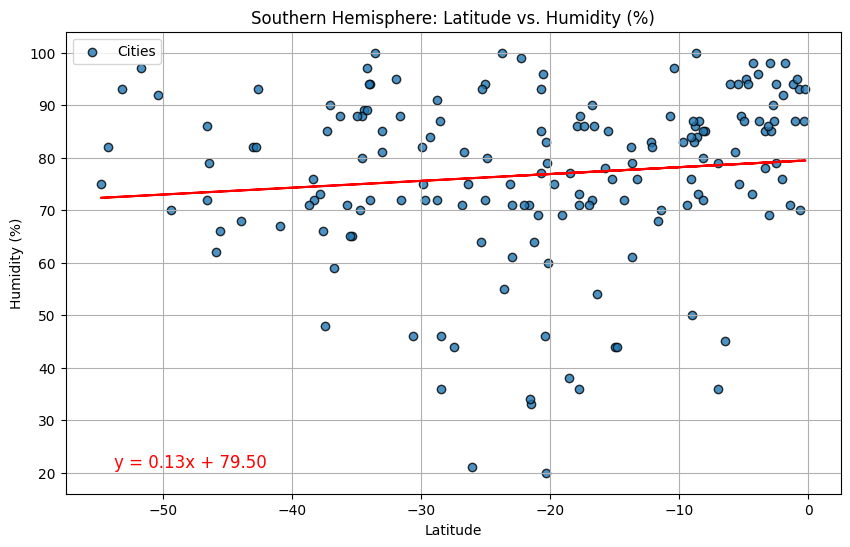

In [89]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Humidity"], 
                       "Latitude", 
                       "Humidity (%)", 
                       "Southern Hemisphere: Latitude vs. Humidity (%)", 
                       "Southern_Hemisphere_Lat_vs_Humidity_Regression.png")

**Discussion about the linear relationship:
Northern Hemisphere
-The scatter plot for latitude vs. humidity in the Northern Hemisphere shows a very weak positive linear relationship, as indicated by the equation. The slope of 0.02 suggests that humidity increases slightly with increasing latitude, but the change is minimal. The R-squared value of 0.00 indicates that the linear model does not explain the variability in humidity based on latitude. In other words, latitude is not a significant predictor of humidity in the Northern Hemisphere. The weak relationship suggests that other factors, such as proximity to water bodies, altitude, local weather patterns, and geographic features, play a more substantial role in determining humidity levels in the Northern Hemisphere.

Southern Hemisphere
-The linear relationship between latitude and humidity in the Southern Hemisphere is also weak, as indicated by the slope of 0.13. Humidity increases slightly with latitude. The intercept at 79.50 suggests that at the equator (latitude 0), the expected humidity is around 79.50%. The weak relationship indicates that latitude alone does not significantly predict humidity, with other regional and local factors influencing humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.00


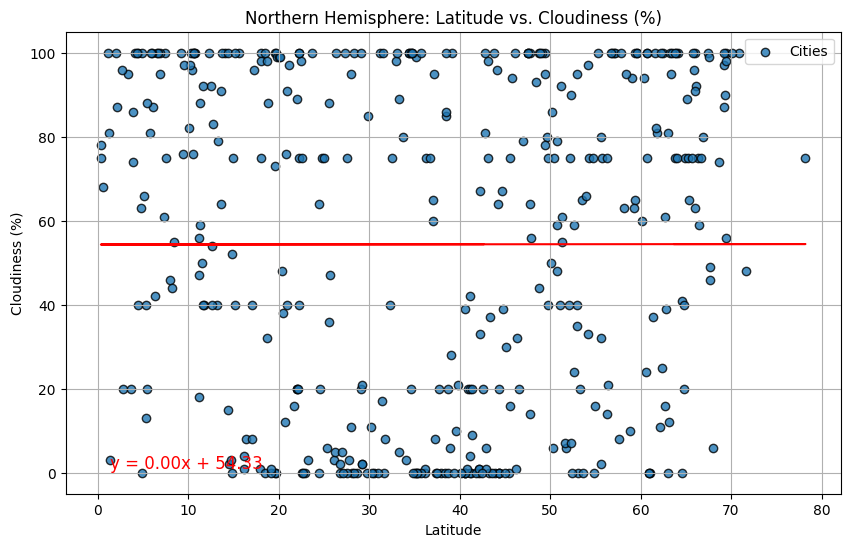

In [94]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness (%)", 
                       "Northern Hemisphere: Latitude vs. Cloudiness (%)", 
                       "Northern_Hemisphere_Lat_vs_Cloudiness_Regression.png")

The r-squared value is 0.00


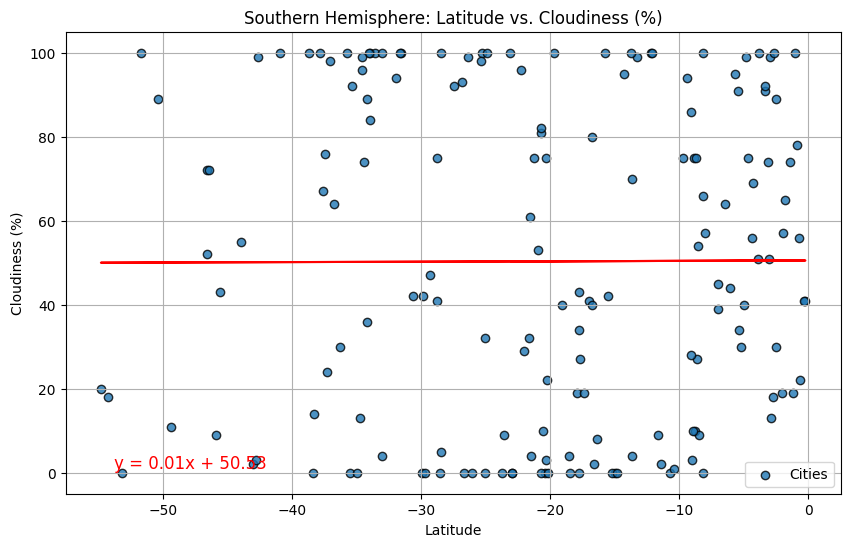

In [95]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness (%)", 
                       "Southern Hemisphere: Latitude vs. Cloudiness (%)", 
                       "Southern_Hemisphere_Lat_vs_Cloudiness_Regression.png")

**Discussion about the linear relationship:
In both the northern and southern hemispheres, latitude does not appear to have any meaningful effect on cloudiness. The near-zero slopes and intercepts close to average cloudiness values suggest that other factors might be influencing cloudiness more significantly than latitude. The zero R-values emphasize the absence of a linear relationship, indicating that latitude alone is not a good predictor of cloudiness in the dataset provided.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.00


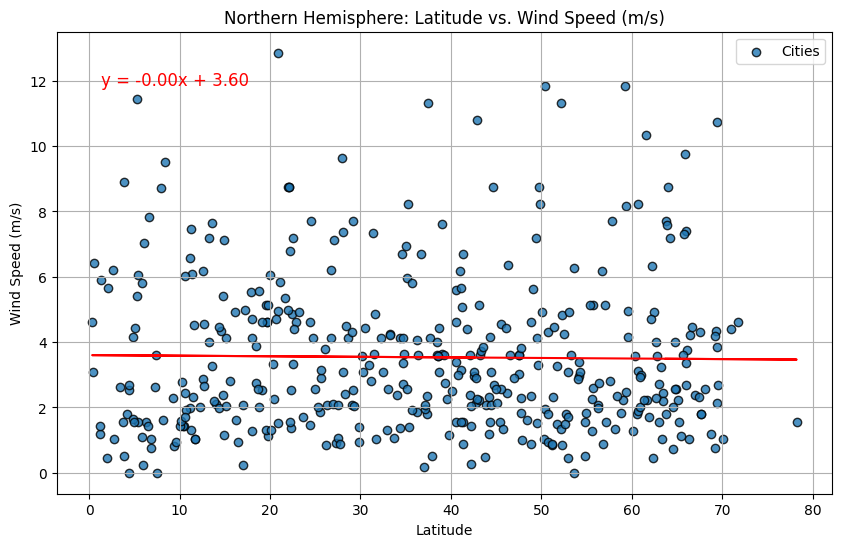

In [104]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add text for line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_values.min() + 1, y_values.max() - 1), fontsize=12, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    
    # Print R-squared value
    print(f"The r-squared value is {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Load the data
city_data_df = pd.read_csv("output_data/cities.csv")

# Filter data for Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Plot linear regression for wind speed vs. latitude in the Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed (m/s)", 
                       "Northern Hemisphere: Latitude vs. Wind Speed (m/s)", 
                       "Northern_Hemisphere_Lat_vs_Wind_Speed_Regression.png")

The r-squared value is 0.07


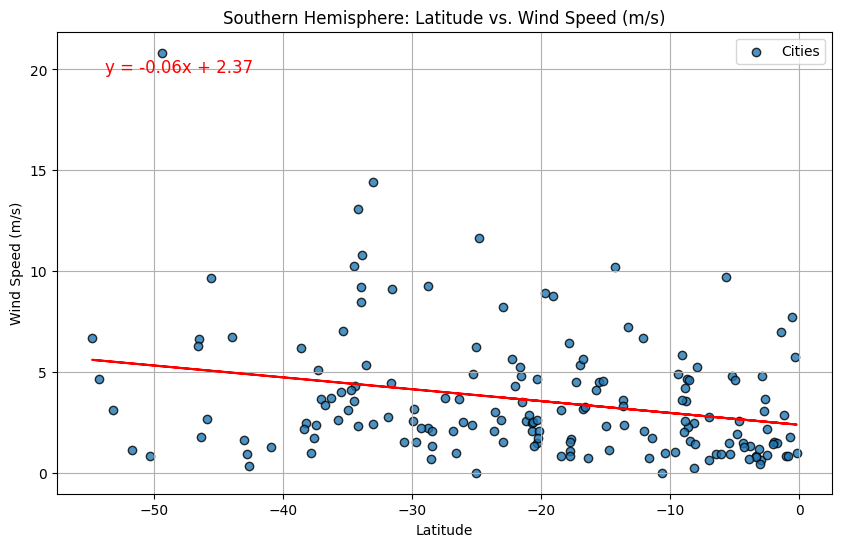

In [103]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add text for line equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_values.min() + 1, y_values.max() - 1), fontsize=12, color="red")
    
    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    
    # Print R-squared value
    print(f"The r-squared value is {rvalue**2:.2f}")
    
    # Show plot
    plt.show()

# Load the data
city_data_df = pd.read_csv("output_data/cities.csv")

# Filter data for Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Plot linear regression for wind speed vs. latitude in the Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed (m/s)", 
                       "Southern Hemisphere: Latitude vs. Wind Speed (m/s)", 
                       "Southern_Hemisphere_Lat_vs_Wind_Speed_Regression.png")


**Discussion about the linear relationship:
Both hemispheres show weak relationships between latitude and wind speed, with the southern hemisphere showing slightly more correlation. The intercept terms in both equations indicate baseline wind speeds at the equator, with the southern hemisphere having a slightly lower baseline. The negative slopes suggest a tendency for wind speed to decrease slightly as one moves away from the equator, but the effect is very small in both cases. Overall, while there may be some correlation between latitude and wind speed, other factors likely have a much stronger influence on wind patterns, such as local geography, temperature gradients, and atmospheric pressure systems.